In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

Part 1: Implementing and plotting the Mandelbrot set

In [20]:
# hyperparameters
# bounds for the search space [x,y]
lowerBounds = [-2.0, -1.5]
upperBounds = [1.0, 1.5]

In [21]:
def mandelbrot(c, max_iter):
    '''
    Determines whether complex number c lies within the mandelbrot set via the escape time algorithm.
    
    Args:
        c (complex):    Complex number to be tested.
        max_iter (int): Number of iterations to perform.
        
    Returns:
        z (complex): The complex number at iteration max_iter.
        n (int): The number of iterations before the escape condition is reached.
    '''
    z = 0 + 0j
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return z, n

def plot_mandelbrot(width, height, max_iter):
    '''
    Plots the Mandelbrot set at a given resolution and number of iterations.
    
    Args:
        width (int):    width of generated image in pixels.
        height (int):   height of generated image in pixels.
        max_iter (int): maximum number of iterations to be performed when calculating the set.
    
    Returns:
        None
    '''
    
    # Set arrays to store the mandelbrot set
    x, y = np.linspace(lowerBounds[0], upperBounds[0], width), np.linspace(lowerBounds[1], upperBounds[1], height)
    mandelbrot_set = np.empty((height, width))
    mandelbrot_set_bool = np.empty((height, width))
    
    # Calculate the mandelbrot set
    for i in range(height):
        for j in range(width):
            z, mandelbrot_set[i, j] = mandelbrot(x[j] + 1j * y[i], max_iter)
            if abs(z) <= 2:
                mandelbrot_set_bool[i, j] = 1
            else:
                mandelbrot_set_bool[i, j] = 0
    
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_set, extent=(lowerBounds[0], upperBounds[0], lowerBounds[1], upperBounds[1]),
               cmap='inferno', interpolation='bilinear')
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()
    
    print(mandelbrot_set_bool)
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_set_bool)
    plt.colorbar()
    plt.title("Mandelbrot Set")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()

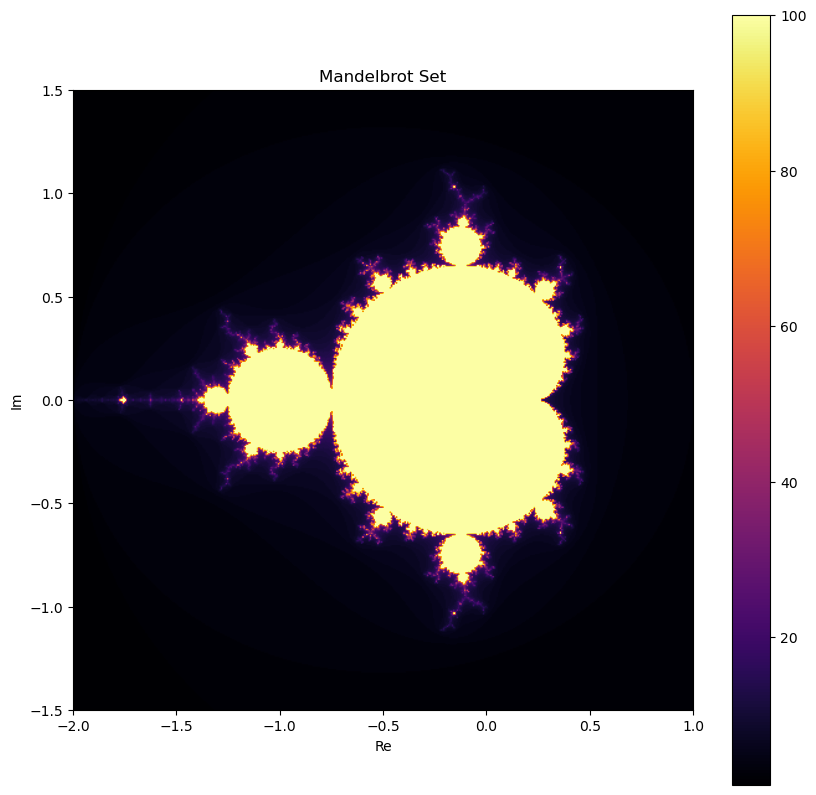

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


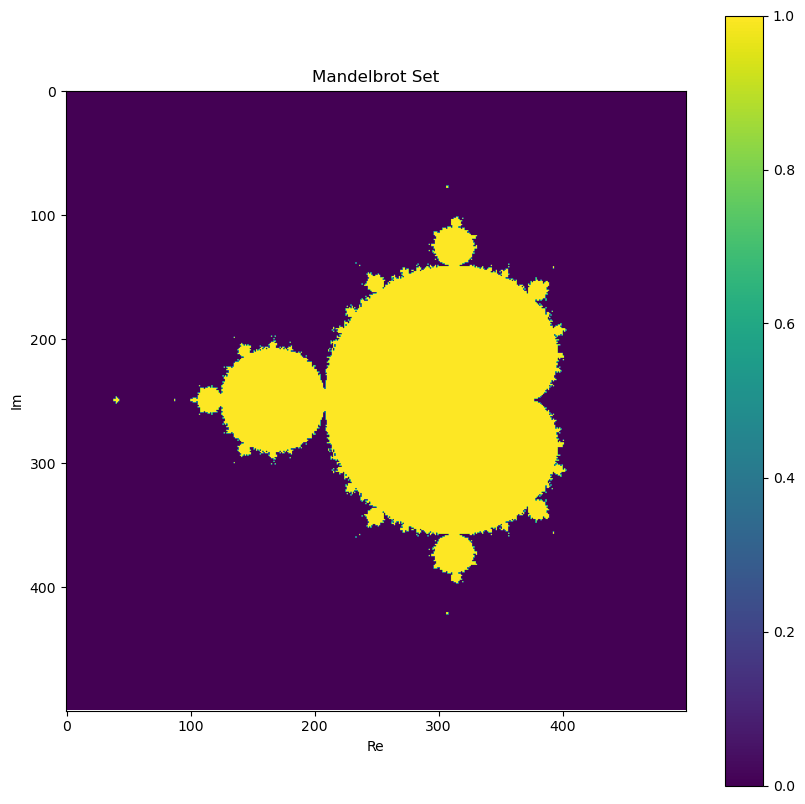

In [22]:
# Plot the Mandelbrot set with given parameters
plot_mandelbrot(500, 500, 100)

Part 2

In [ ]:
def MCAreaMandelbrot(sample_size, max_iter, lowerBounds, upperBounds, sampling_method):
    """Monte Carlo approximation of area Mandelbrot Set

    Args: 
    sample_size (int): number of points used in MC (Note for orthogonal sampling, number of 
        points needs to be p**2 where p is a prime number)
    max_iter (int): max number of iterations
    lowerBounds (2d list): lower bounds of MC square [xmin,ymin], where x = real(z) y = imag(z)
    upperBounds (2d list): upper bounds of MC square [xmax,ymax], where x = real(z) y = imag(z)
    sampling_method (str): choose sampling method "latin" (Latin hypercube sampling), "orthogonal" (Orthogonal sampling) 
        or "random" (pure random sampling)

    Returns:
    MC approximation of area Mandelbrot set (float)
    
    """

    if sampling_method == "latin":

        sampler = qmc.LatinHypercube(d=2,strength=1)
        sample = sampler.random(sample_size)
        sample_scaled = qmc.scale(sample, lowerBounds, upperBounds)

    # number of points needs to be p**2 where p is a prime number
    if sampling_method == "orthogonal":

        sampler = qmc.LatinHypercube(d=2,strength=2)
        sample = sampler.random(sample_size)
        sample_scaled = qmc.scale(sample, lowerBounds, upperBounds)
    
    if sampling_method == "random":
        sample_scaled = np.random.uniform(low=lowerBounds, high=upperBounds, size=(sample_size, 2))

    mc_count = 0
    for i in range(sample_size):
        z, _ = mandelbrot(sample_scaled[i][0] + 1j * sample_scaled[i][1], max_iter)
        
        if abs(z) <= 2:
            mc_count += 1

    area_of_region = abs(upperBounds[0] - lowerBounds[0]) * abs(upperBounds[1] - lowerBounds[1]) 

    return (float(mc_count) * area_of_region) / sample_size

print(MCAreaMandelbrot(101**2,100, lowerBounds, upperBounds,sampling_method="orthogonal"))

1.5413194784825017


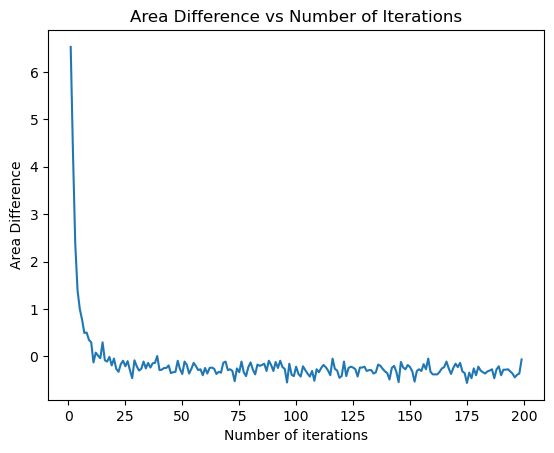

In [26]:
# Question 2 investigating s and I relation 
# Conlusion - S reduces variance 
S = 1000
I = [200]

for i in I: 
    J = np.arange(1,i,1)
    Iarea = MCAreaMandelbrot(S,i,lowerBounds,upperBounds,sampling_method="random")
    areadiffs = []

    for j in J:
        area = MCAreaMandelbrot(S,j,lowerBounds,upperBounds,sampling_method="random")
        areadiffs.append(area - Iarea)
    plt.plot(J,areadiffs)
plt.xlabel('Number of iterations')
plt.ylabel('Area Difference')
plt.title('Area Difference vs Number of Iterations')
plt.show()

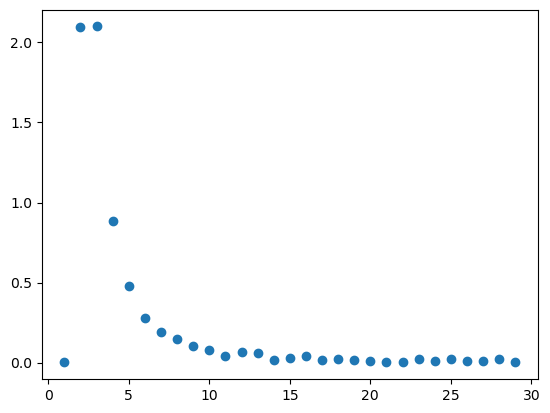

In [ ]:
def convergence_testing(S=100000,iterations=30):
    """Check convergence of MC area estimation of Mandelbrot set by checking area difference
    abs(A_n - A_(n-1)) for n from [1,iterations]

    Args:
    S (int): number of MC samples
    iterations (int): number of iterations for Mandelbrot set

    Returns:
    iter_values (np.array): iterations corresponding to area differences
    area_diffs (np.array): area differences abs(A_n - A_(n-1)) for n [1,iterations]

    """
    iter_values = np.arange(1,iterations,1)
    area_diffs = []
    prev_area = None

    if prev_area == None:
        prev_area = MCAreaMandelbrot(S,1,lowerBounds,upperBounds,sampling_method="random")

    for i in iter_values:
        area = MCAreaMandelbrot(S,i,lowerBounds,upperBounds,sampling_method="random")
        area_diffs.append(abs(area - prev_area))
        prev_area = area

    return iter_values, np.array(area_diffs)

iter_values, area_diffs = convergence_testing()

plt.figure()
plt.scatter(iter_values,area_diffs)
plt.show()
